# Exploratory Data Analysis

Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data.

### Histograms using Matplotlib


You specify the number of `bins` using the `bins` keyword argument of `plt.hist()`.

By default histograms have 10 `bins`.

The `square root rule` is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.

You can manually define the 'bin edges', e.g.

```py
bin_edges = [1,10,20,30,40,50,60,70,80,90,100]
_ = plt.hist(versicolor_petal_length, bin=bin_edges)
```

Results in the x-axis going from 0-100, and 10 columns.

Mapplotlib's `.hist()` method accepts Pandas dataframes as well as Numpy arrays.

Often, the plot will be assigned to a `dummy` variable, `_`. 

```py
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()
```

This is to prevent unnecessary output from being displayed. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a `;` after your plotting statements to achieve the same effect.

In [10]:
# import iris dataset
from sklearn.datasets import load_iris

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set default Seaborn style
sns.set()

# subset of the data set containing the Iris versicolor petal lengths in units cm 
#versicolor_petal_length = data.
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

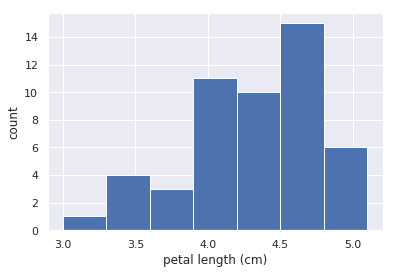

In [11]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### Bea Swarm Plosts using Seaborn

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths.

In [18]:
# load iris data
iris = load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['CLASS'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![Iris Dataset Overview](imgs/iris_dataset_1.png)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


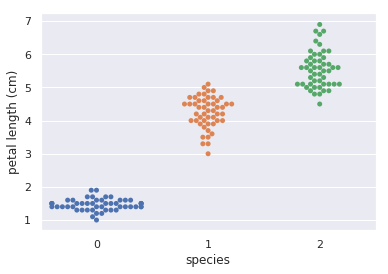

In [19]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='CLASS', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Empirical Cumulative Distribution Function (ECDF)

References: 

https://www.codementor.io/kripanshubharga/calculate-ecdf-in-python-gycltzxi3

ECDF is a step function that jumps up by 1/n at each of the n data points.

Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    # The x-values are the sorted data. Use the np.sort() function to perform the sorting.
    x = np.sort(data)

    # y-data for the ECDF: y
    # The y data of the ECDF go from 1/n to 1 in equally spaced increments. 
    # You can construct this using np.arange(). Remember, however, that the end 
    # value in np.arange() is not inclusive. Therefore, np.arange() will need 
    # to go from 1 to n+1. Be sure to divide this by n.
    y = np.arange(1, n + 1) / n

    return x, y


You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

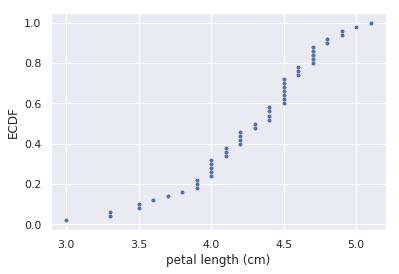

In [21]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('petal length (cm)')

# Display the plot
plt.show()


ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species.

In [22]:
setosa_petal_length = np.array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [26]:
virginica_petal_length = np.array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

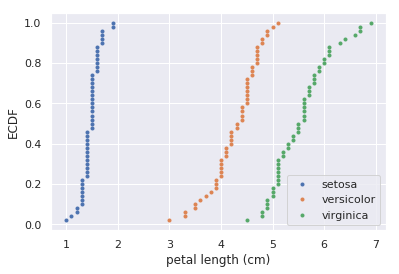

In [27]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()